In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

train_df = pd.read_csv('/kaggle/input/titanic/train.csv',index_col=0)
test_df = pd.read_csv('/kaggle/input/titanic/test.csv',index_col=0)


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

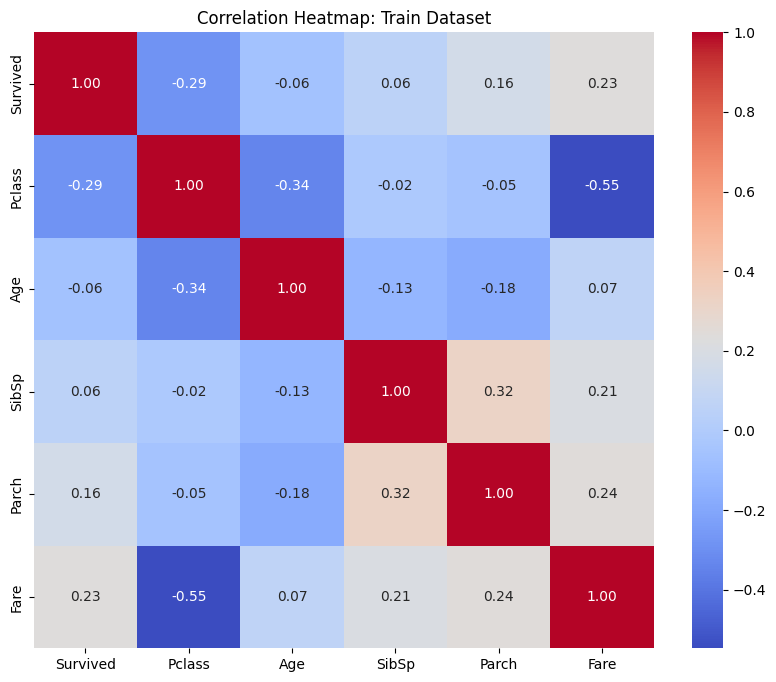

In [50]:
correlation_matrix = train_df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Train Dataset')
plt.show()

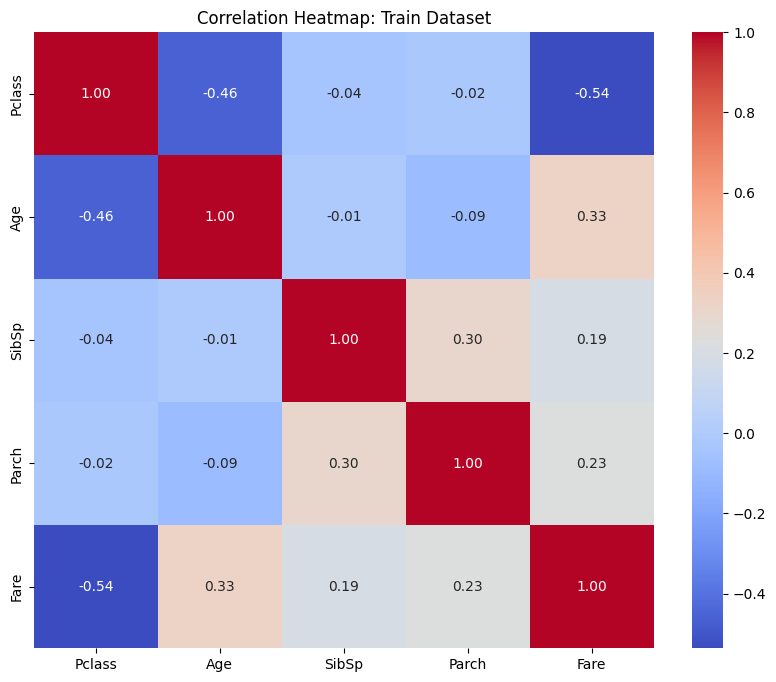

In [51]:
correlation_matrix = test_df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Train Dataset')
plt.show()

In [7]:
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].median())

In [8]:
train_df["Cabin"]=train_df["Cabin"].fillna("Unknown")

In [9]:
train_df["Embarked"]=train_df["Embarked"].fillna(train_df["Cabin"].str[0])

In [10]:
train_df.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [11]:
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].median())

In [12]:
test_df["Cabin"]=test_df["Cabin"].fillna("Unknown")

In [13]:
test_df["Fare"]=test_df["Fare"].fillna(test_df["Fare"].median())

In [14]:
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [15]:
train_df["Ticket"].duplicated().sum()

210

In [16]:
test_df["Ticket"].duplicated().sum()

55

In [17]:
train_df = train_df.drop_duplicates(subset='Ticket', keep='first')

In [18]:
train_df["Ticket"].duplicated().sum()

0

In [19]:
test_df = test_df.drop_duplicates(subset='Ticket', keep='first')

In [20]:
test_df["Ticket"].duplicated().sum()

0

In [21]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [22]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.05,Unknown,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Unknown,Q


In [23]:
train_df.shape

(681, 11)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  681 non-null    int64  
 1   Pclass    681 non-null    int64  
 2   Name      681 non-null    object 
 3   Sex       681 non-null    object 
 4   Age       681 non-null    float64
 5   SibSp     681 non-null    int64  
 6   Parch     681 non-null    int64  
 7   Ticket    681 non-null    object 
 8   Fare      681 non-null    float64
 9   Cabin     681 non-null    object 
 10  Embarked  681 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 63.8+ KB


In [25]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.350954,2.362702,30.313142,0.274596,0.205580,23.274118
std,0.477620,0.814765,12.225762,0.670437,0.585635,36.960049
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,35.000000,0.000000,0.000000,26.000000
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [26]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S


In [27]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,Unknown,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S
1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,Unknown,S
1309,3,"Peter, Master. Michael J",male,27.0,1,1,2668,22.3583,Unknown,C


In [28]:
test_df.shape

(363, 10)

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    363 non-null    int64  
 1   Name      363 non-null    object 
 2   Sex       363 non-null    object 
 3   Age       363 non-null    float64
 4   SibSp     363 non-null    int64  
 5   Parch     363 non-null    int64  
 6   Ticket    363 non-null    object 
 7   Fare      363 non-null    float64
 8   Cabin     363 non-null    object 
 9   Embarked  363 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 31.2+ KB


In [30]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,363.000000,363.000000,363.000000,363.000000,363.000000
mean,2.322314,29.486446,0.355372,0.267218,27.813935
std,0.823161,12.118015,0.767354,0.683426,46.231212
min,1.000000,0.330000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,27.000000,0.000000,0.000000,13.000000
75%,3.000000,34.750000,1.000000,0.000000,26.550000
max,3.000000,76.000000,8.000000,6.000000,512.329200


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

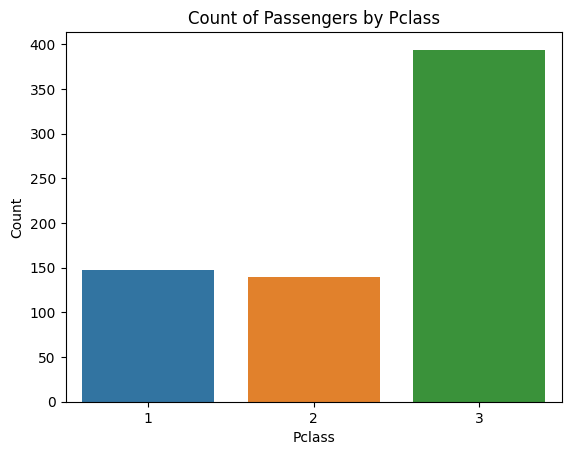

In [38]:
sns.countplot(data=train_df, x='Pclass')
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

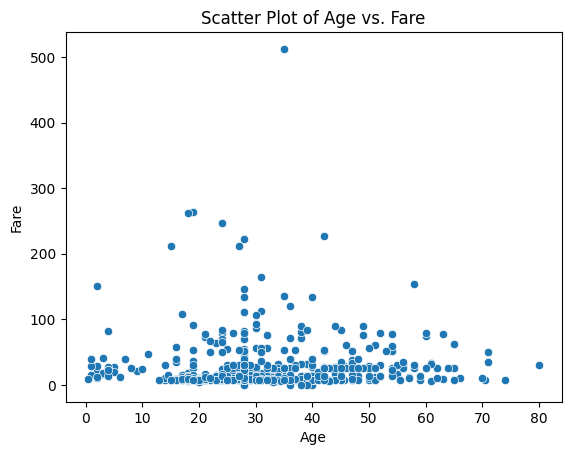

In [42]:
sns.scatterplot(data=train_df, x='Age', y='Fare')
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

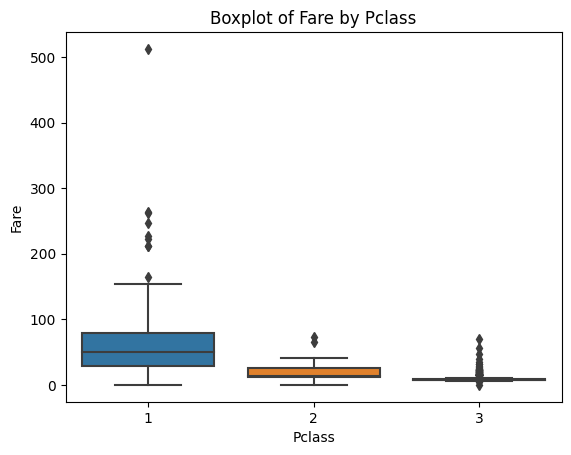

In [43]:
sns.boxplot(data=train_df, x='Pclass', y='Fare')
plt.title('Boxplot of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

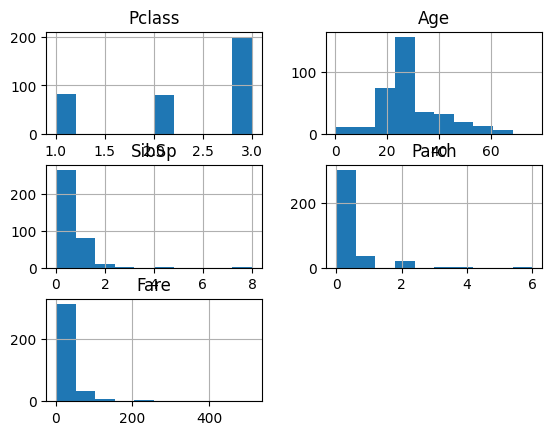

In [44]:
test_df.hist()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

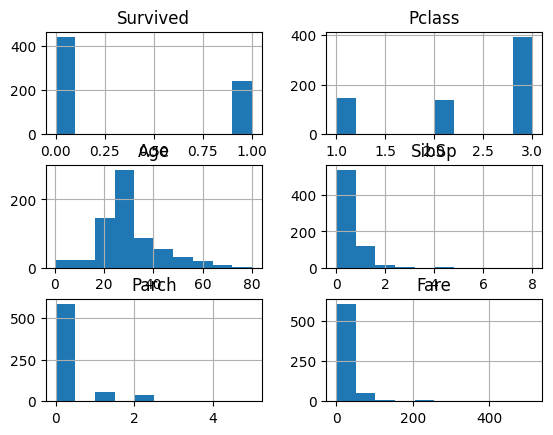

In [45]:
train_df.hist()

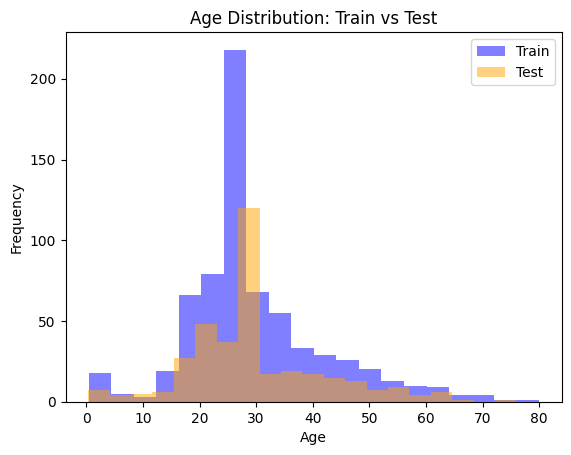

In [47]:
plt.hist(train_df['Age'].dropna(), bins=20, alpha=0.5, label='Train', color='blue')
plt.hist(test_df['Age'].dropna(), bins=20, alpha=0.5, label='Test', color='orange')
plt.title('Age Distribution: Train vs Test')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

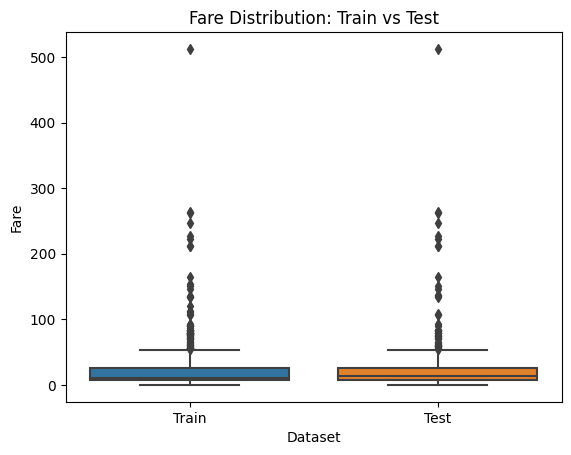

In [49]:
combined = train_df.copy()
combined['Dataset'] = 'Train'
test_df['Survived'] = None  # Add target placeholder to match columns
test_df['Dataset'] = 'Test'
combined = pd.concat([combined, test_df])

sns.boxplot(data=combined, x='Dataset', y='Fare')
plt.title('Fare Distribution: Train vs Test')
plt.show()